 **Reading & Writing GeoData**



In [ ]:
pip install geopandas matplotlib shapely


In [11]:

import geopandas as gpd

# Load full GeoJSON from the URL
url = "https://gist.githubusercontent.com/wboykinm/6979292/raw/fe0c968ae6408e63186d09181f8d61299345bbeb/us-states.geojson"
gdf = gpd.read_file(url)

# Filter only a few states (say 5)
sample_states = gdf[gdf['name'].isin(['California', 'Texas', 'New York', 'Florida', 'Illinois'])]

# Save as shapefile and GeoJSON
sample_states.to_file("sample_us_states.geojson", driver="GeoJSON")
sample_states.to_file("world_shapefile.shp")
# Check result
print(sample_states.head())


    id        name                                           geometry
4   06  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...
9   12     Florida  POLYGON ((-85.49714 30.99754, -85.00421 31.003...
13  17    Illinois  POLYGON ((-90.63998 42.51006, -88.78878 42.493...
32  36    New York  POLYGON ((-73.34381 45.01303, -73.33285 44.804...
43  48       Texas  POLYGON ((-101.81294 36.50186, -100.00008 36.5...


In [5]:
#GeoSeries is like a Series of geometries (Points, Polygons, etc.)
#GeoDataFrame is like a DataFrame that includes a GeoSeries as its geometry column.
# Create points
from shapely.geometry import Point, Polygon
cities = gpd.GeoSeries([
    Point(77.5946, 12.9716),  # Bangalore
    Point(72.8777, 19.0760),  # Mumbai
    Point(88.3639, 22.5726)   # Kolkata
], crs="EPSG:4326")

print(cities)


0    POINT (77.5946 12.9716)
1     POINT (72.8777 19.076)
2    POINT (88.3639 22.5726)
dtype: geometry


In [6]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame({'City': ['Bangalore', 'Mumbai', 'Kolkata']}, geometry=cities)

print(gdf)

        City                 geometry
0  Bangalore  POINT (77.5946 12.9716)
1     Mumbai   POINT (72.8777 19.076)
2    Kolkata  POINT (88.3639 22.5726)


In [ ]:
import geopandas as gpd

gdf=gpd.read_file("/content/sample_us_states.geojson")
print(gdf.head())
print(gdf.columns)
print(gdf.crs)

   id        name                                           geometry
0  06  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...
1  12     Florida  POLYGON ((-85.49714 30.99754, -85.00421 31.003...
2  17    Illinois  POLYGON ((-90.63998 42.51006, -88.78878 42.493...
3  36    New York  POLYGON ((-73.34381 45.01303, -73.33285 44.804...
4  48       Texas  POLYGON ((-101.81294 36.50186, -100.00008 36.5...
Index(['id', 'name', 'geometry'], dtype='object')
EPSG:4326


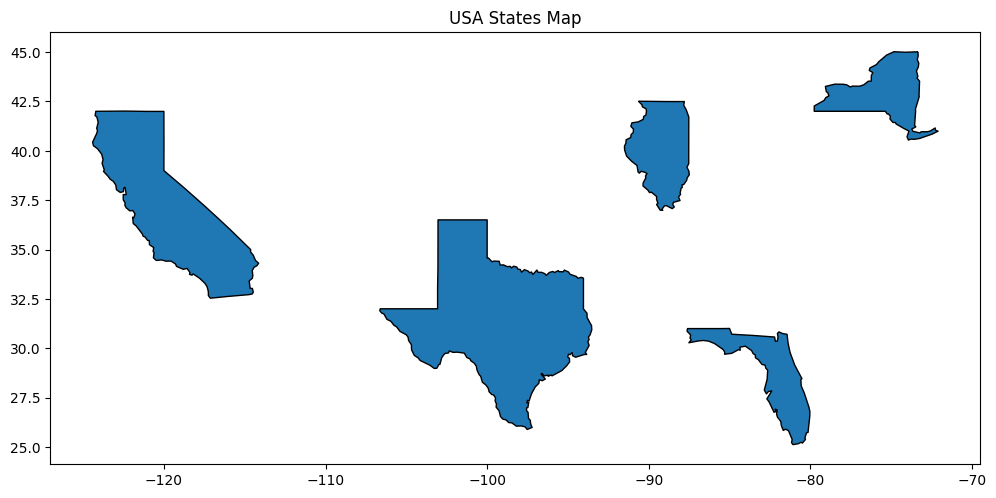

In [ ]:
import matplotlib.pyplot as plt

gdf.plot(edgecolor='black', figsize=(12, 8))
plt.title("USA States Map")
plt.show()

   id        name                                           geometry
0  06  California  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


<Axes: >

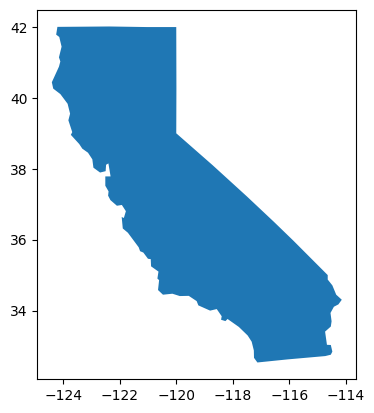

In [ ]:
ca = gdf[gdf['name'] == 'California']
print(ca)
ca.plot()

In [ ]:
from shapely.geometry import Point

# Create a point
point = Point(-119.4179, 36.7783)  # Somewhere in California

# Check which state contains the point
for _, row in gdf.iterrows():
    if row['geometry'].contains(point):
        print("This point is in:", row['name'])

This point is in: California


In [ ]:
gdf['centroid'] = gdf.centroid
gdf['area'] = gdf.area  # Area in degrees (not meters unless projected)


print(gdf[['name', 'area', 'centroid']].head())


         name       area                     centroid
0  California  41.644424  POINT (-119.61439 37.25389)
1     Florida  13.800047   POINT (-82.50397 28.65889)
2    Illinois  15.434366   POINT (-89.19574 40.06267)
3    New York  14.011017   POINT (-75.50111 42.94336)
4       Texas  65.184289   POINT (-99.35787 31.49517)


/tmp/ipython-input-13-137729250.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid
/tmp/ipython-input-13-137729250.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['area'] = gdf.area  # Area in degrees (not meters unless projected)


In [ ]:
# Reproject GeoDataFrame to a projected CRS
gdf_proj = gdf.to_crs(epsg=5070)

# Now safely calculate area and centroid
gdf_proj['area_km2'] = gdf_proj.area / 1e6  # area in square kilometers
gdf_proj['centroid'] = gdf_proj.centroid

print(gdf_proj[['name', 'area_km2', 'centroid']])

         name       area_km2                          centroid
0  California  409731.272506  POINT (-2043317.742 1826231.698)
1     Florida  149569.640974    POINT (1321851.707 714647.334)
2    Illinois  146208.398995    POINT (575118.208 1912069.983)
3    New York  126515.490317   POINT (1651049.125 2395032.019)
4       Texas  686552.159692    POINT (-315188.955 940156.302)
